Preprocesamiento de datos

In [44]:
### importacion de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import r2_score

In [45]:
# carga de datos

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('datasets/data.csv')

In [46]:
# Configura pandas para mostrar el contenido completo de las filas
pd.set_option('display.max_colwidth', None)

In [47]:
data = data.rename(columns={'jobTitle':'job_title',
                            'perfEval':'perf_eval',
                            'basePay':'base_pay'})

In [48]:
# creamos una columna nueva con el salario total

data['total_salary'] = data['base_pay'] + data['bonus']

In [49]:
# función que calcule la categoría de edad

def assing_age_range(age):
    if age < 0 or pd.isna(age):
        return 'NA'
    elif age < 20:
        return '0-19'
    elif age < 40:
        return '20-39'
    elif age < 60:
        return '40-59'
    elif age >= 60:
        return '60+'


In [50]:
# función que calcule la categoría de ingresos

def total_salary_range(salary):
    if salary < 40000 or pd.isna(salary):
        return '< 40,000'
    elif salary < 80001:
        return '40,000-80,000'
    elif salary < 120001:
        return '80,001-120,000'
    elif salary < 160001:
        return '120,001-160,000'
    elif salary >= 160001:
        return '> 160,000'

In [51]:
# funcion variable objetivo


def variblae_objetivo(salary):
    if salary < 110000 or pd.isna(salary):
        return 0
    elif salary >= 110000:
        return 1


In [52]:
data['total_salary_range'] = data['total_salary'].apply(total_salary_range)

data['age_group'] = data['age'].apply(assing_age_range)

data['salary_110k'] = data['total_salary'].apply(variblae_objetivo)

In [53]:
data.head()

,job_title,gender,age,perf_eval,edu,dept,seniority,base_pay,bonus,total_salary,total_salary_range,age_group,salary_110k
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301,"40,000-80,000",0-19,0
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604,"80,001-120,000",20-39,1
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476,"80,001-120,000",0-19,0
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234,"80,001-120,000",20-39,1
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783,"80,001-120,000",20-39,0


In [54]:
testisng_df = (
    data
    .drop(columns={'age','base_pay','bonus','total_salary'})
)

In [55]:
testisng_df.head()

,job_title,gender,perf_eval,edu,dept,seniority,total_salary_range,age_group,salary_110k
0,Graphic Designer,Female,5,College,Operations,2,"40,000-80,000",0-19,0
1,Software Engineer,Male,5,College,Management,5,"80,001-120,000",20-39,1
2,Warehouse Associate,Female,4,PhD,Administration,5,"80,001-120,000",0-19,0
3,Software Engineer,Male,5,Masters,Sales,4,"80,001-120,000",20-39,1
4,Graphic Designer,Male,5,Masters,Engineering,5,"80,001-120,000",20-39,0


### Codificacion de etiquetas

En este apartado vamos a condificar las etiquetas, esto debido a que un modelo de ML no puede procesar datos que sean calitativos pero tampoco podemos eliminarlos por lo que debemos de codificarlos.

Por ejemplo con la variable de sexo vamos a transformar

- 'femenino' a '0'
- 'masculino' a '1'
- 'otros' a '2'

de esta manera el algorithmo podra realizar los calculos mantematicos. 

In [56]:
encoder = OrdinalEncoder()

encoder.fit(testisng_df) 

data_ordinal = pd.DataFrame(encoder.fit_transform(testisng_df), 
                                                      columns=testisng_df.columns)

print(data_ordinal.head())

   job_title  gender  perf_eval  edu  dept  seniority  total_salary_range  \
0        3.0     0.0        4.0  0.0   3.0        1.0                 1.0   
1        8.0     1.0        4.0  0.0   2.0        4.0                 2.0   
2        9.0     0.0        3.0  3.0   0.0        4.0                 2.0   
3        8.0     1.0        4.0  2.0   4.0        3.0                 2.0   
4        3.0     1.0        4.0  2.0   1.0        4.0                 2.0   

   age_group  salary_110k  
0        0.0          0.0  
1        1.0          1.0  
2        0.0          0.0  
3        1.0          1.0  
4        1.0          0.0  


### Dividir los datos en conjuntos

En esta parte vamos a dividir los conjutnos de datos en `features` donde eliminaremos todo aquello que no sea una caracteristica y `target` donde unicamente utilizaremos la columna exited donde tendremos la variable objetivo.

Despues dividiremos los sets en 3 partes:

- Entrenamiento (`train`): 60%
- Validacion (`Val`): 20%
- Testeo (`test`): 20%

de esta manera podremos hacer las pruebas necesarias en los modelos de ML y validar poder nuestros resultados. 

In [57]:
# Segementamos los datos en un conjunto de entrenamiento, uno de validacion y otro de prueba 

features = data_ordinal.drop(columns=['salary_110k'])
target = data_ordinal['salary_110k']

# Dividir en conjunto de entrenamiento y prueba
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=0)

# Dividir en conjunto de entrenamiento y validación
features_train, features_val, target_train, target_val = train_test_split(
    features_train, target_train, test_size=0.25, random_state=0) 

### Escalado de caracteristicas

El escalado de caracteristicas consiste en darle un mismo pero sin importar el numero que represente, en otras palabras equilibrar las columnas para que si en balance el cliente tiene `100,000` el modelo no represente que es mas importante que una edad de `24` solo porque sea un numero mas grande.

In [58]:
numeric = ['job_title', 'gender', 'dept']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_val[numeric] = scaler.transform(features_val[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.head()) 

     job_title    gender  perf_eval  edu      dept  seniority  \
787  -0.509126 -1.094442        0.0  1.0  0.653642        4.0   
683  -0.509126  0.913708        2.0  1.0 -0.046689        2.0   
616   0.549104 -1.094442        2.0  2.0  1.353973        2.0   
691  -0.156383 -1.094442        1.0  0.0  1.353973        2.0   
972   1.607333  0.913708        0.0  1.0  0.653642        1.0   

     total_salary_range  age_group  
787                 2.0        2.0  
683                 2.0        2.0  
616                 2.0        2.0  
691                 2.0        1.0  
972                 2.0        3.0  


### Realizar el entrenamiento, validacion y pruebas del modelo

en este apartado revisaremos tres modelos donde iteraremos sobre diferentes valores.

In [59]:
## Arbol de decision. 

best_model = None
best_result = 0
best_depth = 0
for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=0, max_depth=depth, class_weight='balanced')
    model.fit(features_train,target_train)
    predictions_val = model.predict(features_val)
    result = model.score(features_train,target_train)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

# calcula la puntuación de accuracy en el conjunto de entrenamiento
score_train = model.score(features_train,target_train) 
# calcula la puntuación de accuracy en el conjunto de validación
score_val = model.score(features_val,target_val) 

print("Accuracy del modelo de arbol de decision en el conjunto de entrenamiento:", score_train)
print("Accuracy del modelo de arbol de decision en el conjunto de validación:", score_val)

print(f"Accuracy del mejor modelo en el conjunto de validación (max_depth = {best_depth}): {best_result}")

Accuracy del modelo de arbol de decision en el conjunto de entrenamiento: 0.97
Accuracy del modelo de arbol de decision en el conjunto de validación: 0.845
Accuracy del mejor modelo en el conjunto de validación (max_depth = 10): 0.97


In [60]:
## random forest

best_rf_model = None
best_rf_result = 0
best_rf_est = 0
best_rf_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(max_depth=depth, random_state=0, n_estimators=est, class_weight='balanced')
        model.fit(features_train,target_train)
        predictions_val = model.predict(features_val)
        result = model.score(features_train,target_train)
        if result > best_rf_result:
            best_rf_model = model
            best_rf_result = result
            best_rf_est = est
            best_rf_depth = depth

# calcula la puntuación de accuracy en el conjunto de entrenamiento
score_train = best_rf_model.score(features_train,target_train) 
# calcula la puntuación de accuracy en el conjunto de validación
score_val = best_rf_model.score(features_val,target_val) 


print("Accuracy del modelo de arbol aleatorio en el conjunto de entrenamiento:", score_train)
print("Accuracy del modelo de arbol aleatorio en el conjunto de validación:", score_val)


print("Accuracy del mejor modelo en el conjunto de validación", best_rf_result, "n_estimators:", best_rf_est, "best_depth:", best_rf_depth)

Accuracy del modelo de arbol aleatorio en el conjunto de entrenamiento: 0.9983333333333333
Accuracy del modelo de arbol aleatorio en el conjunto de validación: 0.855
Accuracy del mejor modelo en el conjunto de validación 0.9983333333333333 n_estimators: 40 best_depth: 10


In [61]:
# regresion logistica

model = LogisticRegression(random_state=0, solver='liblinear',penalty='l1', class_weight='balanced')
model.fit(features_train,target_train)
predictions_val = model.predict(features_val)

result = mean_squared_error(target_val, predictions_val)**0.5 

# calcula la puntuación de accuracy en el conjunto de entrenamiento
score_train = model.score(features_train,target_train) 
# calcula la puntuación de accuracy en el conjunto de validación
score_val = model.score(features_val,target_val) 

print("Accuracy del modelo de regresion logistica en el conjunto de entrenamiento:", score_train)
print("Accuracy del modelo de regresion logistica en el conjunto de validación:", score_val)

print('El modelo de regresion logistica nos da un ECM de:',result)



Accuracy del modelo de regresion logistica en el conjunto de entrenamiento: 0.8433333333333334
Accuracy del modelo de regresion logistica en el conjunto de validación: 0.835
El modelo de regresion logistica nos da un ECM de: 0.406201920231798


### Metrica F1


In [62]:
predicted_valid = best_rf_model.predict(features_val)


print('F1:', f1_score(target_val, predicted_valid))

F1: 0.7716535433070866


### Valores AUC-ROC

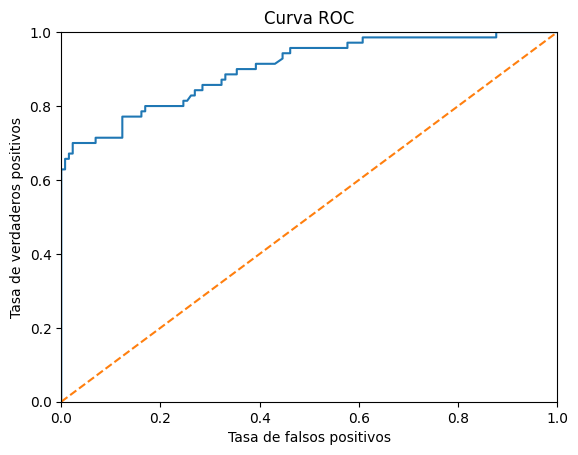

AUC-ROC: 0.9023626373626373


In [63]:
probabilities_valid = best_rf_model.predict_proba(features_val)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_val,probabilities_one_valid)

plt.figure()
# < traza la gráfica >
plt.plot(fpr, tpr)
# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')
# < utiliza las funciones plt.xlim() y plt.ylim() para
#   establecer el límite para los ejes de 0 a 1 >
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
# < utiliza las funciones plt.xlabel() y plt.ylabel() para
#   nombrar los ejes "Tasa de falsos positivos" y "Tasa de verdaderos positivos">
plt.xlabel('Tasa de falsos positivos')
plt.ylabel("Tasa de verdaderos positivos")
# < agrega el encabezado "Curva ROC" con la función plt.title() >
plt.title('Curva ROC')
plt.show()

auc_roc = roc_auc_score(target_val,probabilities_one_valid)

print('AUC-ROC:',auc_roc)

### R2

R2 se calcula de la siguiente manera:

$$R2 = 1 - ( Modelo ECM / Media ECM )$$

- R2 es igual a uno solo si el valor Modelo ECM es cero. Dicho modelo predeciría perfectamente todas las respuestas.
- R2 es cero: el modelo funciona tan bien como la media.
- Cuando R2 es negativo, la calidad del modelo es muy baja.
- R2 no puede tener valores mayores a uno.

In [64]:
%%time
print('R2 =', r2_score(target_val,predicted_valid))

R2 = 0.3626373626373628
CPU times: user 1.23 ms, sys: 51 µs, total: 1.28 ms
Wall time: 270 µs
